In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sbn
import pickle as pkl 

pd.set_option('display.max_columns', 100)

In [2]:
info = pd.read_csv('../data/raw/ccle_info.txt')
info.head()

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,culture_medium,cas9_activity,RRID,WTSI_Master_Cell_ID,sample_collection_site,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0465,2201.0,ascites,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0002,55.0,haematopoietic_and_lymphoid_tissue,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0025,NaN,Colon,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,RPMI + 10% FBS,52.4,CVCL_0001,783.0,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL 92.1.7,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Suspension,RPMI + 10% FBS,86.6,CVCL_2481,NaN,bone_marrow,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


In [3]:
mutation = pd.read_csv('../data/raw/ccle_mutation.txt')
mutation.head()

C:\Users\natha\miniconda3\envs\gcnvae\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (3,19,22,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Genome_Change,Annotation_Transcript,DepMap_ID,cDNA_Change,Codon_Change,Protein_Change,isDeleterious,isTCGAhotspot,TCGAhsCnt,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,A,NaN,NaN,g.chr1:12359347C>A,ENST00000358136.3,ACH-000001,c.6122C>A,c.(6121-6123)tCa>tAa,p.S2041*,True,False,NaN,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,-,rs58218425|rs139261871|rs369427733|rs560787141,byFrequency,g.chr1:12726308_12726322delCTGGCGTGACGCCAT,ENST00000376221.1,ACH-000001,c.786_800delCTGGCGTGACGCCAT,c.(784-801)tcctggcgtgacgccatc>tcc,p.WRDAI263del,False,False,NaN,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,A,NaN,NaN,g.chr1:24484172G>A,ENST00000327535.1,ACH-000001,c.1011C>T,c.(1009-1011)ggC>ggT,p.G337G,False,False,NaN,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,A,NaN,NaN,g.chr1:25785018_25785019insA,ENST00000374343.4,ACH-000001,c.789_790insA,c.(790-792)aaafs,p.K264fs,True,False,0.0,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,G,NaN,NaN,g.chr1:33954141T>G,ENST00000361328.3,ACH-000001,c.494T>G,c.(493-495)gTg>gGg,p.V165G,False,False,NaN,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN


In [4]:
methyl = pd.read_csv('../data/raw/ccle_methyl.txt', sep='\t')
methyl.head()

C:\Users\natha\miniconda3\envs\gcnvae\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (280,491,502,567,636) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cluster_id,gene_name,RefSeq_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,NCIH1184_LUNG,HCC2157_BREAST,NCIH2227_LUNG,SNU449_LIVER,NCIH28_PLEURA,OV56_OVARY,RMUGS_OVARY,LN229_CENTRAL_NERVOUS_SYSTEM,P31FUJ_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RKN_SOFT_TISSUE,PATU8988S_PANCREAS,NH6_AUTONOMIC_GANGLIA,SF126_CENTRAL_NERVOUS_SYSTEM,RERFLCAD2_LUNG,OUMS23_LARGE_INTESTINE,SNGM_ENDOMETRIUM,OUMS27_BONE,NCIH2347_LUNG,SW1990_PANCREAS,HS940T_FIBROBLAST,HS611T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RERFGC1B_STOMACH,HT1080_SOFT_TISSUE,NCIH2087_LUNG,COV318_OVARY,NCIH2085_LUNG,NCIH510_LUNG,CAKI1_KIDNEY,NCIH716_LARGE_INTESTINE,NCIH2066_LUNG,NCIH1341_LUNG,NCIH2029_LUNG,SW480_LARGE_INTESTINE,HS746T_STOMACH,LU65_LUNG,SNUC2A_LARGE_INTESTINE,...,CAL62_THYROID,LCLC103H_LUNG,JURKAT_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MHHCALL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,M07E_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,L428_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MOLT16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,LCLC97TM1_LUNG,2313287_STOMACH,BHT101_THYROID,JVM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CAL51_BREAST,L363_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,KMH2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SIMA_AUTONOMIC_GANGLIA,NUDUL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BC3C_URINARY_TRACT,SUDHL6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,REC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OCIM1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SIGM5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUDHL5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCPAP_THYROID,639V_URINARY_TRACT,CL11_LARGE_INTESTINE,TT2609C02_THYROID,CL34_LARGE_INTESTINE,RCHACV_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CAL120_BREAST,647V_URINARY_TRACT,RH18_SOFT_TISSUE,MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,F36P_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,EJM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ML1_THYROID,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MOLP8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
0,SGIP1_1,SGIP1,NM_032291,1:66998970;1:66998973,5.44,0.00000,NaN,NaN,0.00000,1.00000,NaN,NaN,NaN,0.36840,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,0.92306,1.00000,NaN,NaN,NaN,0.33335,NaN,0.16670,NaN,1.00000,0.96773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,...,1.00000,NaN,NaN,NaN,0.03925,0.00000,0.91665,NaN,0.00000,NaN,0.31579,NaN,0.00000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67860,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37500,NaN,NaN,0.00000,0.50000,NaN,0.58330,NaN,NaN,NaN,0.00000,0.02780,NaN,NaN,0.00000,NaN,NaN,1.00000
1,SGIP1_2,SGIP1,NM_032291,1:66999404;1:66999412,16.74,0.00000,0.00000,0.75000,0.00000,0.95835,NaN,1.00000,NaN,0.00000,NaN,0.04545,1.00000,0.80955,0.00000,1.00000,1.00000,0.50000,0.76470,0.11113,0.08332,1.00000,NaN,0.22860,NaN,NaN,0.25000,NaN,0.29450,0.00000,0.66670,0.00000,1.00000,0.41670,0.33330,1.00000,0.00000,0.00000,NaN,NaN,NaN,0.00000,0.00000,0.65000,NaN,0.31250,...,0.00000,NaN,NaN,1.00000,0.00000,NaN,NaN,0.74998,0.50000,1.00000,0.25000,0.06250,0.00000,1.00000,0.00000,0.06250,NaN,NaN,NaN,0.06250,0.04347,0.12500,0.00000,0.66670,0.00000,0.45450,NaN,NaN,0.42105,0.04545,0.61115,NaN,NaN,NaN,NaN,0.00000,1.00000,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.77660,0.06665,NaN
2,AZIN2_1,AZIN2,NM_001301823,1:33546151;1:33546209;1:33546210;1:33546385;1:...,617.75,0.00992,0.01418,0.20272,0.12528,0.00671,0.01776,0.07882,0.01572,0.11932,0.01598,0.02503,0.02492,0.10903,0.02103,0.14762,0.04338,0.11876,0.02447,0.01773,0.00970,0.04634,0.09796,0.09515,0.28385,0.03247,0.05968,0.00189,0.06353,0.11388,0.13405,0.04105,0.0

In [16]:
met = methyl.values[:, 5:].ravel().astype(float)

In [17]:
np.isnan(met).mean()

0.09168339455744622

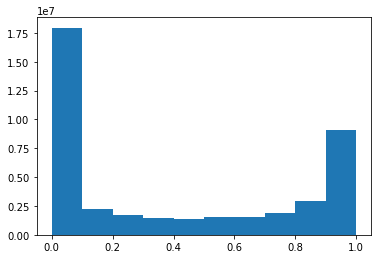

In [18]:
plt.figure()
plt.hist(met)
plt.show()

In [19]:
# how many unique genes have methylation? 
methyl.gene_name.unique().shape[0]

20587

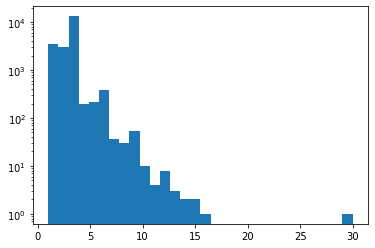

In [45]:
# whats the distribution of # of CpG sites / genes 
plt.figure()
plt.hist(methyl.groupby('gene_name').count()['cluster_id'], bins=30)
plt.yscale('log')
plt.show()

In [32]:
# within CpG sites for the same gene, how much variation is there? e.g., do they follow similar trends - all meth or all unmeth
methyl.groupby('gene_name').agg(['mean', 'std'], axis=0)

avg_coverage            
                  mean         std
gene_name                         
A1BG        153.086667  169.715991
A1BG-AS1    209.060000  191.892082
A2M-AS1     198.113333  298.943488
A2ML1        53.600000   67.971321
A3GALT2      22.400000   16.824806
...                ...         ...
ZYG11A      241.380000  201.207098
ZYG11B      155.740000         NaN
ZYX         542.403333  714.196500
ZZEF1       181.735000  242.841682
ZZZ3        176.773333  167.789632

[20587 rows x 2 columns]

In [5]:
copynum = pd.read_csv('../data/raw/ccle_cnv.txt')
copynum.head()

,Unnamed: 0,DDX11L1 (100287102),WASH7P (653635),FAM138A (645520),OR4F5 (79501),LOC729737 (729737),LOC102725121 (102725121),LOC101928626 (101928626),LOC100133331 (100133331),LOC100288069 (100288069),FAM87B (400728),LINC00115 (79854),LINC01128 (643837),FAM41C (284593),LOC100130417 (100130417),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PLEKHN1 (84069),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),LOC100288175 (100288175),RNF223 (401934),C1orf159 (54991),LINC01342 (254099),MIR200B (406984),MIR200A (406983),MIR429 (554210),TTLL10 (254173),TNFRSF18 (8784),TNFRSF4 (7293),SDF4 (51150),B3GALT6 (126792),C1QTNF12 (388581),UBE2J2 (118424),SCNN1D (6339),ACAP3 (116983),MIR6726 (102465434),SNORD167 (109623456),PUSL1 (126789),INTS11 (54973),MIR6727 (102465435),CPTP (80772),TAS1R3 (83756),DVL1 (1855),MIR6808 (102466740),MXRA8 (54587),AURKAIP1 (54998),...,FAM197Y9 (100132932),LINC00280 (100873964),AMELY (266),TBL1Y (90665),PRKY (5616),TTTY16 (252948),TTTY12 (83867),LINC00279 (100873963),TTTY18 (252950),TTTY19 (252952),TTTY11 (83866),RBMY1A3P (286557),TTTY20 (252951),TSPY1 (7258),TSPY10 (100289087),TSPY3 (728137),TSPY8 (728403),TSPY4 (728395),FAM197Y5 (100289150),FAM197Y4 (100289188),FAM197Y8 (105379268),FAM197Y7 (105379269),FAM197Y2 (252946),FAM197Y6 (105379270),FAM197Y3 (107987341),RBMY3AP (64593),TTTY22 (252954),GYG2P1 (352887),TTTY15 (64595),USP9Y (8287),DDX3Y (8653),UTY (7404),TMSB4Y (9087),NLGN4Y (22829),NLGN4Y-AS1 (100874056),TTTY14 (83869),BCORP1 (286554),TXLNGY (246126),KDM5D (8284),TTTY10 (246119),EIF1AY (9086),RPS4Y2 (140032),PRORY (100533178),RBMY2EP (159125),TTTY13 (83868),TTTY5 (83863),RBMY2FP (159162),LOC100652931 (100652931),DAZ1 (1617),DAZ2 (57055)
0,ACH-000322,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,0.849081,...,1.860817e+00,1.860817e+00,1.860817,1.860817e+00,1.860817e+00,1.860817e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,1.321032e+00,3.466566e-09,2.858439e-09,2.858439e-09,2.858439e-09,2.858439e-09,3.579428e-09,1.213755e-07,3.941034e-09,2.838831e-09,3.600914e-09,2.251058e-03,2.694380e-09,2.658835e-09,2.658835e-09,2.811720e-09,3.320283e-09,3.320283e-09,3.320283e-09,3.488598e-09,3.488598e-09,3.488598e-09,3.488598e-09,3.488598e-09
1,ACH-001094,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,1.104693,...,2.112268e-01,2.112268e-01,0.211227,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.112268e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,2.101941e-01,1.505324e-01,1.560566e-01
2,ACH-000141,0.993963,0.993963,0.993963,0.993963,0.993963,0.993963,0.993963,0.993963,0.993963,0.993963,0.9

In [8]:
cnv_est = np.random.choice(copynum.values[:, 1:].ravel(), size=int(1e6)).astype(float)

print('prop. nan', np.isnan(cnv_est).mean())

cnv_est = cnv_est[~np.isnan(cnv_est)]
print('mean', cnv_est.mean())
print('std', cnv_est.std())
print('min', cnv_est.min())
print('max', cnv_est.max())

prop. nan 7e-06
mean 1.011213962164521
std 0.2093426017751285
min 6.256372046256564e-10
max 6.8698257661633


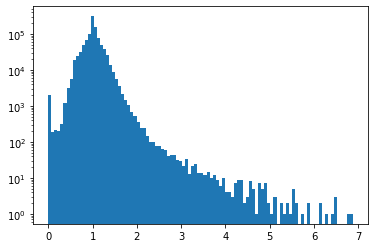

In [11]:
plt.figure() 
plt.hist(cnv_est, bins=100)
plt.yscale('log')
plt.show()